In [358]:
from math import sqrt
from math import floor

In [2]:
def calculate_distance(row1, row2):
    return sqrt(
        sum(
        [(row1[0][i] - row2[0][i])**2 for i in range(len(row1))]
    )
    )

In [351]:
def manDist(row1,row2):
     return abs(
        sum(
        [(row1[0][i] - row2[0][i]) for i in range(len(row1))]
    )
    )

In [368]:
def dist3(row1,row2):
    return abs(sum(
        [(row1[0][i] - row2[0][i])**3 for i in range(len(row1))]
    ))**(1./3)

In [369]:
# Test distance function
dataset = [
    ([1,2], 1), ([2,1], 1), 
    ([0,1], 0), ([1,0], 0)
]
 
# compute distance from a data point
test_row = ([.5, .5], -1)
 
distances = [calculate_distance(test_row, row) for row in dataset]
print(distances)

[1.5811388300841898, 1.5811388300841898, 0.7071067811865476, 0.7071067811865476]


In [376]:
def get_neighbors(train, test_row, num_neighbors=3):
    
    #compute distancesJIFOWJEFIOJ
    distances = [(train_row, calculate_distance(test_row, train_row)) 
                 for train_row in train]
    
    #sort
    distances.sort(key=lambda tup: tup[1])
    
    #get top-k neighbors
    neighbors = [distances[i][0] for i in range(num_neighbors)]
    
    return neighbors

In [5]:
# test get_get_neighbors function with top-3 neighbors
neighbors = get_neighbors(dataset, test_row)
print(neighbors)

[([0, 1], 0), ([1, 0], 0), ([1, 2], 1)]


In [213]:
def predict_classification(train, test_row, num_neighbors=3):
    
    #get top-k neighbors
    neighbors = get_neighbors(train, test_row, num_neighbors)
    
    # get most frequent label
    output_values = [row[-1] for row in neighbors]

    prediction = max(set(output_values), key=output_values.count)
    
    return prediction

In [37]:
def confusionMatrix(train, testData, num_neighbors = 3):
    #get a parallel array of predicted labels
    predictedLabels = [predict_classification(train, i, num_neighbors) for i in testData]
    
    #create 2d empty confusion Matrix
    labelSet = set([row[-1] for row in train])
    labels = list(labelSet)
    confusionMatrix = [[0] * len(labels) for i in range(len(labels))]
    
    #fill the confusion matrix
    for i in range(len(testData)):                           #go through all of the test data by index
        if testData[i][1] == (predictedLabels[i]):           #if the parallel arrays match labels update confusion matrix accordingly
            for labelIndex in range(len(labels)):            #go through all the labels
                if labels[labelIndex] == predictedLabels[i]: #when label match is found update corresponding diagonal in ConfusionMatrix
                    confusionMatrix[labelIndex][labelIndex] += 1
                    break
        else:
            #determine the label index of the predicted and true labels
            predictedIndex = -1;
            trueIndex = -1;
            for labelIndex in range(len(labels)):
                if labels[labelIndex] == predictedLabels[i]:
                    predictedIndex = labelIndex
                if labels[labelIndex] == testData[i][1]:
                    trueIndex = labelIndex
            confusionMatrix[trueIndex][predictedIndex] += 1
    
    return (confusionMatrix, labels)

In [67]:
def accuracyMatrix(cMatrix, labels):
    
    accuracyMatrix = [-1.0] * len(labels)
    totalEntries = sum(sum(cMatrix,[]))
    
    for accuracyIndex in range(len(labels)): #for each label for return value accuracy Matrix
        notTrueNegCount = 0
        truePosCount = cMatrix[accuracyIndex][accuracyIndex]
        numerator = 0
        
        #get the count of entries that were not trueNegatives
        for labelIndex in range(len(labels)):
            notTrueNegCount += cMatrix[accuracyIndex][labelIndex] + cMatrix[labelIndex][accuracyIndex]
        notTrueNegCount -= truePosCount
        
        trueNegCount = totalEntries - notTrueNegCount    #determine the TrueNegativeCount
        numerator = trueNegCount + truePosCount          
        accuracyMatrix[accuracyIndex] = numerator/totalEntries
    return accuracyMatrix
        

In [70]:
def precisionMatrix(cMatrix, labels):
    precisionMatrix = [-1.0] *len(labels)
    
    for precisionIndex in range(len(labels)):
        truePosCount = cMatrix[precisionIndex][precisionIndex]
        posCount = 0
        for label in range(len(labels)):
            posCount += cMatrix[label][precisionIndex]
        precisionMatrix[precisionIndex] = truePosCount/posCount
    
    return precisionMatrix

In [78]:
def recallMatrix(cMatrix, labels):
    recallMatrix = [-1.0] * len(labels)
    
    for recallIndex in range(len(labels)):
        truePosCount = cMatrix[recallIndex][recallIndex]
        predictCount = 0
        for label in range(len(labels)):
            predictCount += cMatrix[recallIndex][label]
        recallMatrix[recallIndex] = truePosCount/predictCount
        
    return recallMatrix

In [85]:
def F1ScoreMatrix(cMatrix,labels):
    pMatrix = precisionMatrix(cMatrix, labels)
    rMatrix = recallMatrix(cMatrix,labels)
    fMatrix = [-1.0] * len(labels)
    for i in range(len(labels)):
        fMatrix[i] = (2*pMatrix[i]*rMatrix[i])/(pMatrix[i]+rMatrix[i])
    return fMatrix

In [86]:
def macAveragePrecision(cMatrix, labels):
    return (sum(precisionMatrix(cMatrix,labels))/len(labels))

In [87]:
def macAverageRecall(cMatrix, labels):
    return (sum(recallMatrix(cMatrix,labels))/len(labels))

In [88]:
def macAverageF1Score(cMatrix, labels):
    return (sum(F1ScoreMatrix(cMatrix,labels))/len(labels))

In [99]:
def supportMatrix(cMatrix, labels):
    sMatrix = [0] * len(labels)
    for supportIndex in range(len(labels)):
        for label in range(len(labels)):
            sMatrix[supportIndex] += cMatrix[supportIndex][label]
            
    return sMatrix

In [108]:
def weightAveragePrecision(cMatrix, labels):
    returnVal = 0
    pMatrix = precisionMatrix(cMatrix,labels)
    sMatrix = supportMatrix(cMatrix,labels)
    totalEntries = sum(sum(cMatrix,[]))
    for label in range(len(labels)):
        returnVal += pMatrix[label]*sMatrix[label]
    return returnVal/totalEntries

In [112]:
def weightAverageRecall(cMatrix, labels):
    returnVal = 0
    rMatrix = recallMatrix(cMatrix,labels)
    sMatrix = supportMatrix(cMatrix,labels)
    totalEntries = sum(sum(cMatrix,[]))
    for label in range(len(labels)):
        returnVal += rMatrix[label]*sMatrix[label]
    return returnVal/totalEntries

In [113]:
def weightAverageF1Score(cMatrix, labels):
    returnVal = 0
    fMatrix = F1ScoreMatrix(cMatrix,labels)
    sMatrix = supportMatrix(cMatrix,labels)
    totalEntries = sum(sum(cMatrix,[]))
    for label in range(len(labels)):
        returnVal += fMatrix[label]*sMatrix[label]
    return returnVal/totalEntries

In [164]:
coMa = [[4,1,1],[6,2,2],[3,0,6]]
labeled = ["Cat", "Fish", "Hen"]
print(precisionMatrix(coMa, labeled))
print(recallMatrix(coMa,labeled))
print(F1ScoreMatrix(coMa,labeled))
print(supportMatrix(coMa,labeled))
print(macAveragePrecision(coMa, labeled))
print(macAverageRecall(coMa,labeled))
print(macAverageF1Score(coMa,labeled))
print(weightAveragePrecision(coMa,labeled))
print(weightAverageRecall(coMa,labeled))
print(weightAverageF1Score(coMa,labeled))


[0.3076923076923077, 0.6666666666666666, 0.6666666666666666]
[0.6666666666666666, 0.2, 0.6666666666666666]
[0.42105263157894735, 0.30769230769230765, 0.6666666666666666]
[6, 10, 9]
0.547008547008547
0.5111111111111111
0.46513720197930725
0.5805128205128205
0.48
0.46412955465587047


In [181]:
# test prediction function
test_data = [([2, 2], 1), ([1,1],0), ([.5, .5], 0)]
prediction = predict_classification(dataset, test_data[0])
(cMatrix, labelList) = confusionMatrix(dataset, test_data, 3)
print(prediction)
print(cMatrix)
print(labelList)

Iris-setosa
Iris-setosa
Iris-setosa
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
{'Iris-setosa'}
^set
Iris-setosa
Iris-setosa
Iris-setosa
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
{'Iris-setosa'}
^set
Iris-setosa
Iris-setosa
Iris-setosa
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
{'Iris-setosa'}
^set
Iris-setosa
Iris-setosa
Iris-setosa
['Iris-setosa', 'Iris-setosa', 'Iris-setosa']
{'Iris-setosa'}
^set
Iris-setosa
[[0, 0, 0], [0, 0, 0], [3, 0, 0]]
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [208]:
print(recallMatrix(cMatrix,labelList))

<class 'ZeroDivisionError'>: division by zero

In [8]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

In [9]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2)

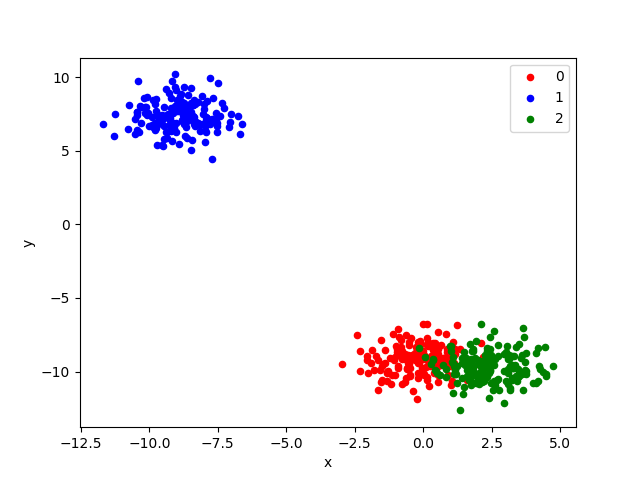

In [10]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2: 'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, 
               color=colors[key])
pyplot.show()

In [11]:
X, y = X.tolist(), y.tolist()
dataset = [(data, label) for data, label in zip(X,y)]

In [14]:
test_data_point = ( [0, 5], 1)
prediction = predict_classification(dataset, test_data_point)
print(prediction)

1


In [371]:
#on to the real meat of the project
dataset = [[[5.1,3.5,1.4,0.2],"Iris-setosa"],
[[4.9,3.0,1.4,0.2],"Iris-setosa"],
[[4.7,3.2,1.3,0.2],"Iris-setosa"],
[[4.6,3.1,1.5,0.2],"Iris-setosa"],
[[5.0,3.6,1.4,0.2],"Iris-setosa"],
[[5.4,3.9,1.7,0.4],"Iris-setosa"],
[[4.6,3.4,1.4,0.3],"Iris-setosa"],
[[5.0,3.4,1.5,0.2],"Iris-setosa"],
[[4.4,2.9,1.4,0.2],"Iris-setosa"],
[[4.9,3.1,1.5,0.1],"Iris-setosa"],
[[5.4,3.7,1.5,0.2],"Iris-setosa"],
[[4.8,3.4,1.6,0.2],"Iris-setosa"],
[[4.8,3.0,1.4,0.1],"Iris-setosa"],
[[4.3,3.0,1.1,0.1],"Iris-setosa"],
[[5.8,4.0,1.2,0.2],"Iris-setosa"],
[[5.7,4.4,1.5,0.4],"Iris-setosa"],
[[5.4,3.9,1.3,0.4],"Iris-setosa"],
[[5.1,3.5,1.4,0.3],"Iris-setosa"],
[[5.7,3.8,1.7,0.3],"Iris-setosa"],
[[5.1,3.8,1.5,0.3],"Iris-setosa"],
[[5.4,3.4,1.7,0.2],"Iris-setosa"],
[[5.1,3.7,1.5,0.4],"Iris-setosa"],
[[4.6,3.6,1.0,0.2],"Iris-setosa"],
[[5.1,3.3,1.7,0.5],"Iris-setosa"],
[[4.8,3.4,1.9,0.2],"Iris-setosa"],
[[5.0,3.0,1.6,0.2],"Iris-setosa"],
[[5.0,3.4,1.6,0.4],"Iris-setosa"],
[[5.2,3.5,1.5,0.2],"Iris-setosa"],
[[5.2,3.4,1.4,0.2],"Iris-setosa"],
[[4.7,3.2,1.6,0.2],"Iris-setosa"],
[[4.8,3.1,1.6,0.2],"Iris-setosa"],
[[5.4,3.4,1.5,0.4],"Iris-setosa"],
[[5.2,4.1,1.5,0.1],"Iris-setosa"],
[[5.5,4.2,1.4,0.2],"Iris-setosa"],
[[4.9,3.1,1.5,0.1],"Iris-setosa"],
[[5.0,3.2,1.2,0.2],"Iris-setosa"],
[[5.5,3.5,1.3,0.2],"Iris-setosa"],
[[4.9,3.1,1.5,0.1],"Iris-setosa"],
[[4.4,3.0,1.3,0.2],"Iris-setosa"],
[[5.1,3.4,1.5,0.2],"Iris-setosa"],
[[5.0,3.5,1.3,0.3],"Iris-setosa"],
[[4.5,2.3,1.3,0.3],"Iris-setosa"],
[[4.4,3.2,1.3,0.2],"Iris-setosa"],
[[5.0,3.5,1.6,0.6],"Iris-setosa"],
[[5.1,3.8,1.9,0.4],"Iris-setosa"],
[[4.8,3.0,1.4,0.3],"Iris-setosa"],
[[5.1,3.8,1.6,0.2],"Iris-setosa"],
[[4.6,3.2,1.4,0.2],"Iris-setosa"],
[[5.3,3.7,1.5,0.2],"Iris-setosa"],
[[5.0,3.3,1.4,0.2],"Iris-setosa"],
[[7.0,3.2,4.7,1.4],"Iris-versicolor"],
[[6.4,3.2,4.5,1.5],"Iris-versicolor"],
[[6.9,3.1,4.9,1.5],"Iris-versicolor"],
[[5.5,2.3,4.0,1.3],"Iris-versicolor"],
[[6.5,2.8,4.6,1.5],"Iris-versicolor"],
[[5.7,2.8,4.5,1.3],"Iris-versicolor"],
[[6.3,3.3,4.7,1.6],"Iris-versicolor"],
[[4.9,2.4,3.3,1.0],"Iris-versicolor"],
[[6.6,2.9,4.6,1.3],"Iris-versicolor"],
[[5.2,2.7,3.9,1.4],"Iris-versicolor"],
[[5.0,2.0,3.5,1.0],"Iris-versicolor"],
[[5.9,3.0,4.2,1.5],"Iris-versicolor"],
[[6.0,2.2,4.0,1.0],"Iris-versicolor"],
[[6.1,2.9,4.7,1.4],"Iris-versicolor"],
[[5.6,2.9,3.6,1.3],"Iris-versicolor"],
[[6.7,3.1,4.4,1.4],"Iris-versicolor"],
[[5.6,3.0,4.5,1.5],"Iris-versicolor"],
[[5.8,2.7,4.1,1.0],"Iris-versicolor"],
[[6.2,2.2,4.5,1.5],"Iris-versicolor"],
[[5.6,2.5,3.9,1.1],"Iris-versicolor"],
[[5.9,3.2,4.8,1.8],"Iris-versicolor"],
[[6.1,2.8,4.0,1.3],"Iris-versicolor"],
[[6.3,2.5,4.9,1.5],"Iris-versicolor"],
[[6.1,2.8,4.7,1.2],"Iris-versicolor"],
[[6.4,2.9,4.3,1.3],"Iris-versicolor"],
[[6.6,3.0,4.4,1.4],"Iris-versicolor"],
[[6.8,2.8,4.8,1.4],"Iris-versicolor"],
[[6.7,3.0,5.0,1.7],"Iris-versicolor"],
[[6.0,2.9,4.5,1.5],"Iris-versicolor"],
[[5.7,2.6,3.5,1.0],"Iris-versicolor"],
[[5.5,2.4,3.8,1.1],"Iris-versicolor"],
[[5.5,2.4,3.7,1.0],"Iris-versicolor"],
[[5.8,2.7,3.9,1.2],"Iris-versicolor"],
[[6.0,2.7,5.1,1.6],"Iris-versicolor"],
[[5.4,3.0,4.5,1.5],"Iris-versicolor"],
[[6.0,3.4,4.5,1.6],"Iris-versicolor"],
[[6.7,3.1,4.7,1.5],"Iris-versicolor"],
[[6.3,2.3,4.4,1.3],"Iris-versicolor"],
[[5.6,3.0,4.1,1.3],"Iris-versicolor"],
[[5.5,2.5,4.0,1.3],"Iris-versicolor"],
[[5.5,2.6,4.4,1.2],"Iris-versicolor"],
[[6.1,3.0,4.6,1.4],"Iris-versicolor"],
[[5.8,2.6,4.0,1.2],"Iris-versicolor"],
[[5.0,2.3,3.3,1.0],"Iris-versicolor"],
[[5.6,2.7,4.2,1.3],"Iris-versicolor"],
[[5.7,3.0,4.2,1.2],"Iris-versicolor"],
[[5.7,2.9,4.2,1.3],"Iris-versicolor"],
[[6.2,2.9,4.3,1.3],"Iris-versicolor"],
[[5.1,2.5,3.0,1.1],"Iris-versicolor"],
[[5.7,2.8,4.1,1.3],"Iris-versicolor"],
[[6.3,3.3,6.0,2.5],"Iris-virginica"],
[[5.8,2.7,5.1,1.9],"Iris-virginica"],
[[7.1,3.0,5.9,2.1],"Iris-virginica"],
[[6.3,2.9,5.6,1.8],"Iris-virginica"],
[[6.5,3.0,5.8,2.2],"Iris-virginica"],
[[7.6,3.0,6.6,2.1],"Iris-virginica"],
[[4.9,2.5,4.5,1.7],"Iris-virginica"],
[[7.3,2.9,6.3,1.8],"Iris-virginica"],
[[6.7,2.5,5.8,1.8],"Iris-virginica"],
[[7.2,3.6,6.1,2.5],"Iris-virginica"],
[[6.5,3.2,5.1,2.0],"Iris-virginica"],
[[6.4,2.7,5.3,1.9],"Iris-virginica"],
[[6.8,3.0,5.5,2.1],"Iris-virginica"],
[[5.7,2.5,5.0,2.0],"Iris-virginica"],
[[5.8,2.8,5.1,2.4],"Iris-virginica"],
[[6.4,3.2,5.3,2.3],"Iris-virginica"],
[[6.5,3.0,5.5,1.8],"Iris-virginica"],
[[7.7,3.8,6.7,2.2],"Iris-virginica"],
[[7.7,2.6,6.9,2.3],"Iris-virginica"],
[[6.0,2.2,5.0,1.5],"Iris-virginica"],
[[6.9,3.2,5.7,2.3],"Iris-virginica"],
[[5.6,2.8,4.9,2.0],"Iris-virginica"],
[[7.7,2.8,6.7,2.0],"Iris-virginica"],
[[6.3,2.7,4.9,1.8],"Iris-virginica"],
[[6.7,3.3,5.7,2.1],"Iris-virginica"],
[[7.2,3.2,6.0,1.8],"Iris-virginica"],
[[6.2,2.8,4.8,1.8],"Iris-virginica"],
[[6.1,3.0,4.9,1.8],"Iris-virginica"],
[[6.4,2.8,5.6,2.1],"Iris-virginica"],
[[7.2,3.0,5.8,1.6],"Iris-virginica"],
[[7.4,2.8,6.1,1.9],"Iris-virginica"],
[[7.9,3.8,6.4,2.0],"Iris-virginica"],
[[6.4,2.8,5.6,2.2],"Iris-virginica"],
[[6.3,2.8,5.1,1.5],"Iris-virginica"],
[[6.1,2.6,5.6,1.4],"Iris-virginica"],
[[7.7,3.0,6.1,2.3],"Iris-virginica"],
[[6.3,3.4,5.6,2.4],"Iris-virginica"],
[[6.4,3.1,5.5,1.8],"Iris-virginica"],
[[6.0,3.0,4.8,1.8],"Iris-virginica"],
[[6.9,3.1,5.4,2.1],"Iris-virginica"],
[[6.7,3.1,5.6,2.4],"Iris-virginica"],
[[6.9,3.1,5.1,2.3],"Iris-virginica"],
[[5.8,2.7,5.1,1.9],"Iris-virginica"],
[[6.8,3.2,5.9,2.3],"Iris-virginica"],
[[6.7,3.3,5.7,2.5],"Iris-virginica"],
[[6.7,3.0,5.2,2.3],"Iris-virginica"],
[[6.3,2.5,5.0,1.9],"Iris-virginica"],
[[6.5,3.0,5.2,2.0],"Iris-virginica"],
[[6.2,3.4,5.4,2.3],"Iris-virginica"],
[[5.9,3.0,5.1,1.8],"Iris-virginica"]]

#training as 80%
training = [[[0, 0, 0, 0], "n/A"] for i in range(120)]
for i in range(40):
    training[i] = dataset[i]
    training[i+40] = dataset[i+50]
    training[i+80] = dataset[i+100]
#validation as 10%
validation = [[0, 0, 0, 0, "n/A"] for i in range(15)]
for i in range(5):
    validation[i] = dataset[i+40]
    validation[i+5] = dataset[i+90]
    validation[i+10] = dataset[i+140]
#test as 10%
testing = [[0, 0, 0, 0, "n/A"] for i in range(15)]
for i in range(5):
    testing[i] = dataset[i+45]
    testing[i+5] = dataset[i+95]
    testing[i+10] = dataset[i+145]

In [372]:
def mostSuccesses(training, validation, k):
    (cMatrix, labels) = confusionMatrix(training, validation, k)
    successes = 0
    for i in range(len(cMatrix)):
        successes += cMatrix[i][i]
    return successes

In [373]:
def findBestK(training, validation):
    record = 0
    recordK = 1
    curr = 0
    kn = 1
    wall = floor(len(training)/2)-1
    for i in range(wall):
        kn+=2
        curr = mostSuccesses(training, validation, kn)
        if(curr > record):
            record = curr
            recordK = kn
    return recordK

In [374]:
bestK = findBestK(training, validation)
(cMatrix, labels) = confusionMatrix(training, testing, bestK)

In [375]:
print(bestK)
print(labels)
print(precisionMatrix(cMatrix, labels))
print(recallMatrix(cMatrix,labels))
print(F1ScoreMatrix(cMatrix,labels))
print(supportMatrix(cMatrix,labels))
print(macAveragePrecision(cMatrix, labels))
print(macAverageRecall(cMatrix,labels))
print(macAverageF1Score(cMatrix,labels))
print(weightAveragePrecision(cMatrix,labels))
print(weightAverageRecall(cMatrix,labels))
print(weightAverageF1Score(cMatrix,labels))

29
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
[1.0, 0.5714285714285714, 0.6666666666666666]
[1.0, 0.8, 0.4]
[1.0, 0.6666666666666666, 0.5]
[5, 5, 5]
0.746031746031746
0.7333333333333334
0.7222222222222222
0.7460317460317459
0.7333333333333333
0.7222222222222221
